<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Seance2_Manipulation_donnees_spatiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séance 2 / Manipulation et représentation de données spatiales avec GeoPandas

GeoPandas est une librairie open source pour faciliter le travail avec des données géospatiales en python. GeoPandas étend les types de données utilisés par les pandas pour permettre des opérations spatiales sur des types géométriques. Les opérations géométriques sont effectuées par shapely. Geopandas dépend en outre de fiona pour l'accès aux fichiers et de matplotlib pour le traçage. 

https://geopandas.org/en/stable/index.html

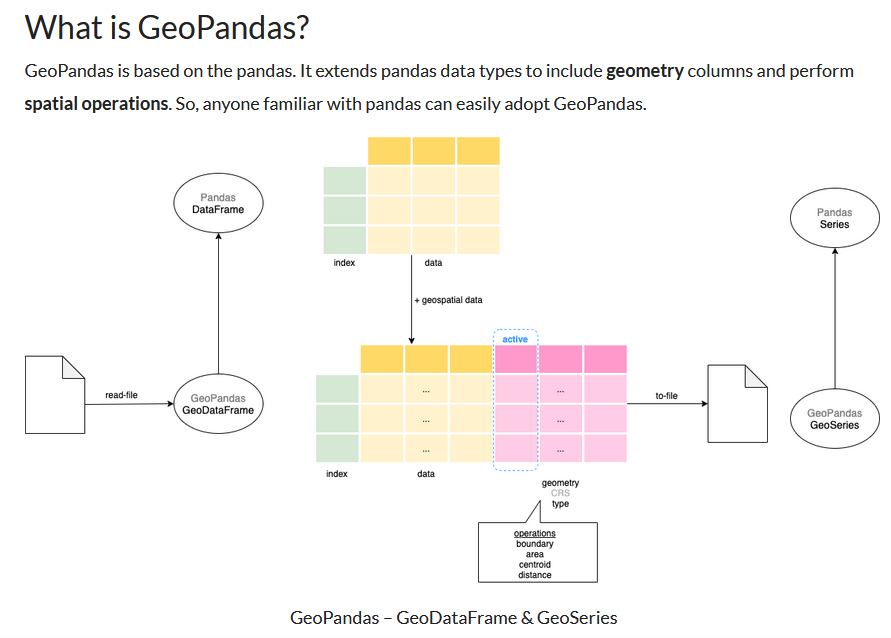

##Configuration de l'environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
! pip install geopandas
# Instal MatplotLib
! pip install matplotlib
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie thématique
!pip install mapclassify
# Pour la cartographie interactive
!pip install folium

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib as plt #Visualisation de données
import geopandas as gpd #Gestion données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import folium #Cartographie interactive
import mapclassify #Cartographie thématique

##Importer les données spatiales de la séance

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris

!wget -O velib.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr 

### La couche IRIS

https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html

nom_iris  ...                                           geometry
0       Notre Dame 3  ...  POLYGON ((2.35215 48.85267, 2.35213 48.85257, ...
1  Folie Mericourt 9  ...  POLYGON ((2.37349 48.86666, 2.37335 48.86689, ...
2          Picpus 23  ...  POLYGON ((2.39777 48.84822, 2.39752 48.84824, ...
3            Gare 11  ...  POLYGON ((2.37039 48.82410, 2.36995 48.82480, ...
4    Saint-Gervais 4  ...  POLYGON ((2.36272 48.85462, 2.36258 48.85467, ...

[5 rows x 8 columns]

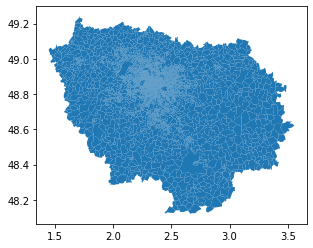

In [ ]:
#Importer le couche des IRIS

IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS.plot()
IRIS.head(5)

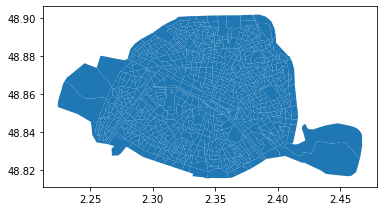

In [ ]:
#Garder uniquement les IRIS de Paris

IRISPARIS = IRIS[(IRIS["dep"] == 75)]
IRISPARIS.plot()

In [ ]:
#Checker les types des champs de la couche IRIS

IRISPARIS.dtypes

nom_iris       object
insee_com       int64
iris            int64
typ_iris       object
code_iris       int64
nom_com        object
dep             int64
geometry     geometry
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


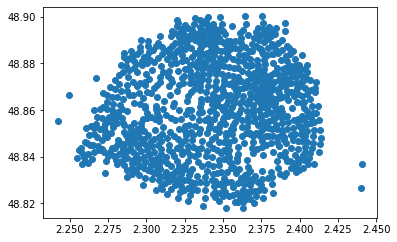

In [ ]:
#Passer les polygones en centroides (à la volée)

IRISPARIS.centroid.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


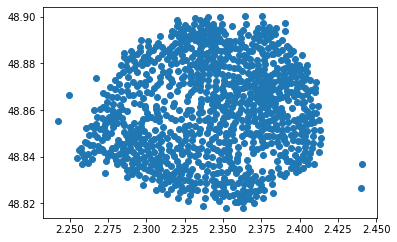

In [ ]:
#Passer les polygones en centroides (comme une couche)

IRISPARIScentro = IRISPARIS.copy()
IRISPARIScentro.geometry = IRISPARIScentro['geometry'].centroid
IRISPARIScentro.plot()

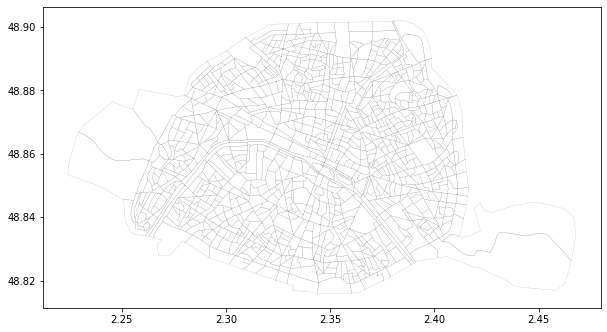

In [ ]:
#Cartographier les IRIS en mode contours

IRISPARIS.boundary.plot(figsize=(10,10), linewidth=0.15, color = 'grey')

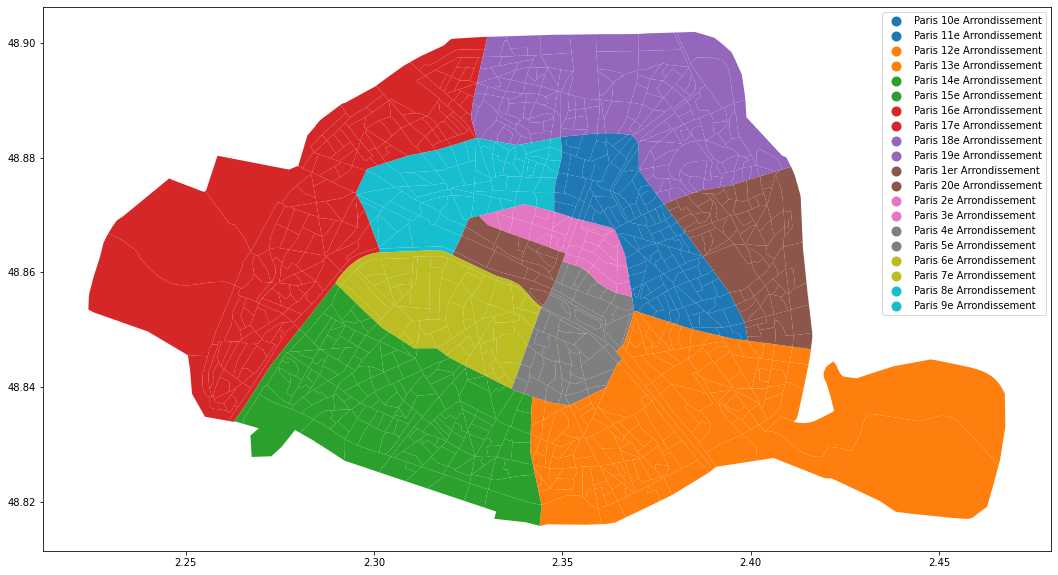

In [ ]:
#Cartographier les IRIS en fonction de l'arrondissement

IRISPARIS.plot(column = "nom_com", linewidth=0.5, figsize=(20,10), legend=True)

In [ ]:
# Faire une carte interactive avec la biliothèque Folium (https://python-visualization.github.io/folium/)

map = folium.Map(
    width='80%',height='50%',
    location=[48.863170000122665, 2.342566412818605],
    zoom_start=12,
    tiles="cartodbpositron")

IRIS = folium.GeoJson(IRISPARIS).add_to(map)

folium.GeoJsonTooltip(['nom_iris', 'nom_com']).add_to(IRIS)

map

In [ ]:
# Exporter cette carte en HTML

map.save(outfile= "folium.html")

### La couche Vélibs

name  ...                  geometry
0                   Toudouze - Clauzel  ...  POINT (2.33736 48.87930)
1        Benjamin Godard - Victor Hugo  ...  POINT (2.27572 48.86598)
2                   Alibert - Jemmapes  ...  POINT (2.36610 48.87104)
3  Charonne - Robert et Sonia Delauney  ...  POINT (2.39257 48.85591)
4             Messine - Place Du Pérou  ...  POINT (2.31551 48.87545)

[5 rows x 13 columns]

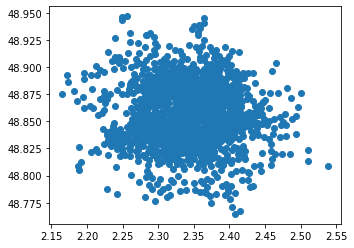

In [ ]:
#Importer la couche des velibs

Velib= gpd.read_file("velib.geojson", encoding='utf-8')
Velib.plot()
Velib.head()

1002

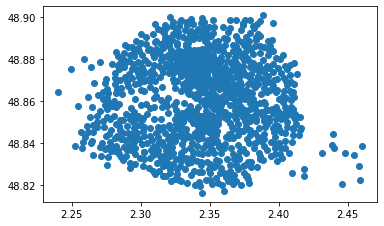

In [ ]:
#Ne garder que les stations de Velibs de la ville de Paris (sélection par attribut)

VelibParis = Velib[(Velib["nom_arrondissement_communes"] == 'Paris')]
VelibParis.plot()
len(VelibParis)

###La couche des arrondissements (à importer via un fichier en local)

https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar

c_ar  ...                                           geometry
0     2  ...  POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...
1     3  ...  POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...
2    10  ...  POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...
3    17  ...  POLYGON ((2.29517 48.87396, 2.29504 48.87378, ...
4    13  ...  POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...

[5 rows x 9 columns]

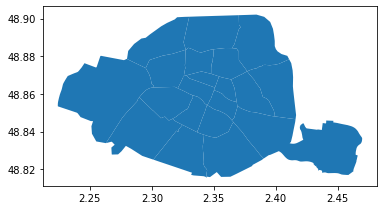

In [ ]:
#Importer le jeu de données dans l'espace de travail puis le convertir en gdf

Ardt= gpd.read_file("arrondissements.geojson", encoding='utf-8')
Ardt.plot()
Ardt.head()

## Ecrire un jeu de données spatiales

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html

In [ ]:
#Ecrire un geojson

VelibParis.to_file("Velibs.geojson", driver="GeoJSON")

#Ecrire un shapefile

VelibParis.to_file("Velibs.shp")

#Ecrire un gpk

IRISPARIS.to_file("Paris.gpkg", layer='IRIS', driver="GPKG")
VelibParis.to_file("Paris.gpkg", layer='VelibParis', driver="GPKG")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  import sys


## Calculer des statistique basiques (descriptives)

In [ ]:
#Calculer des statistiques basiques pour tous les champs de la couche des vélibs

VelibParis.describe()

ebike   mechanical  ...     code_iris     dep
count  1001.000000  1001.000000  ...  1.001000e+03  1001.0
mean      3.703297     7.184815  ...  7.511286e+08    75.0
std       4.252867    10.160355  ...  5.381512e+04     0.0
min       0.000000     0.000000  ...  7.510101e+08    75.0
25%       1.000000     0.000000  ...  7.510933e+08    75.0
50%       2.000000     3.000000  ...  7.511350e+08    75.0
75%       5.000000    10.000000  ...  7.511765e+08    75.0
max      30.000000    62.000000  ...  7.512080e+08    75.0

[8 rows x 9 columns]

In [ ]:
# Calculer le nombre de stations de vélibs

VelibParis["ebike"].size

1001

In [ ]:
# Calculer la somme totale des capacités

VelibParis["capacity"].sum()

32123

In [ ]:
# Calculer la moyenne des capacités

VelibParis["capacity"].mean()

32.09090909090909

In [ ]:
#Calculer le nombre total de station de vélibs, le nombre total de places de vélibs et le nombre moyen de vélibs par station
A=VelibParis['stationcode'].size
B=VelibParis['capacity'].sum()
C=VelibParis['capacity'].mean()

print(A,B,C)

1001 32123 32.09090909090909


In [ ]:
# Calculer le nombre de vélos disponibles et d'emplacement disponibles

## Cartographie thématique

Couleurs de ColorBrewer > https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png 


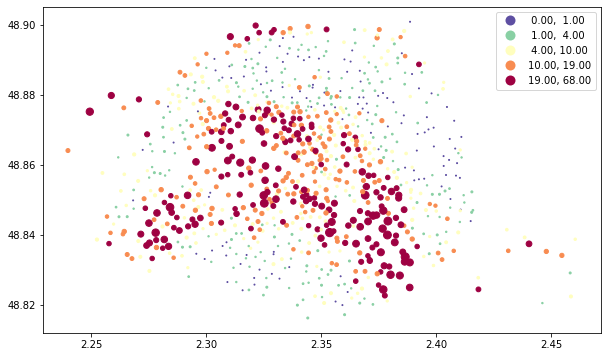

In [ ]:
#Cartographier le nombre de vélibs disponibles par station

VelibParis.plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)


#### Ajouter un fond de carte (Librairie Contextily)

https://contextily.readthedocs.io/en/latest/intro_guide.html

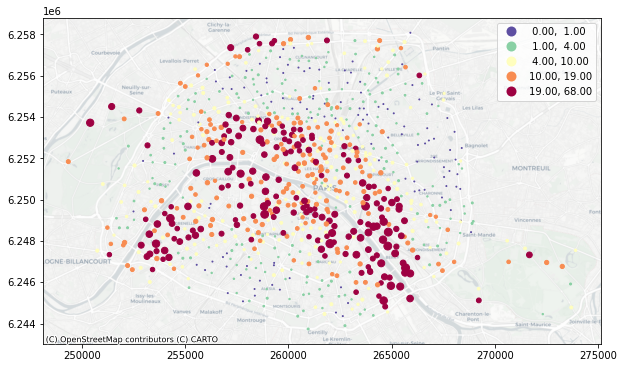

In [ ]:
#Cartographier le nombre de vélibs disponibles par station avec un fond de carte

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)


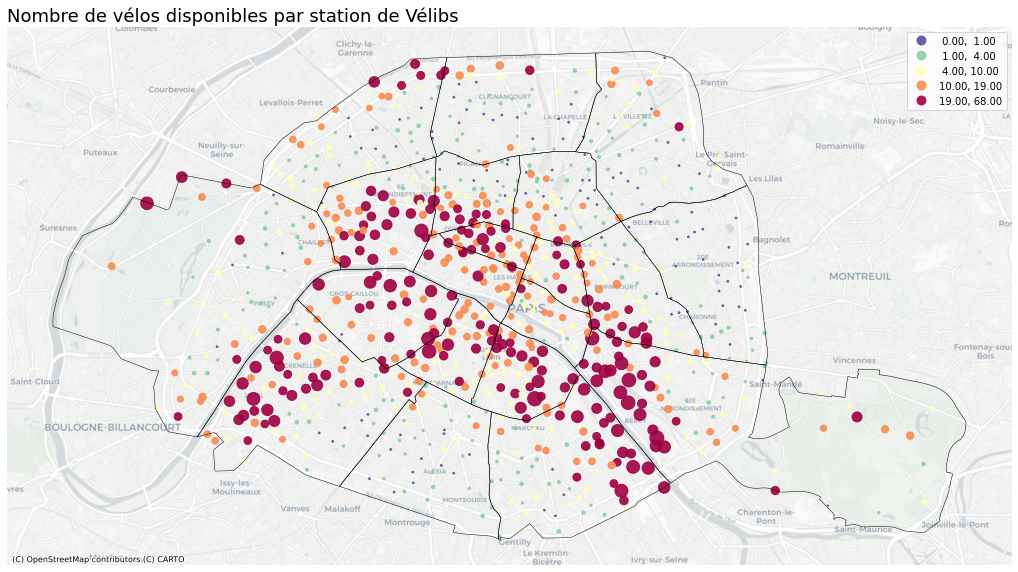

In [ ]:
#Faire une carte avec deux couches

Carte1, ax = plt.pyplot.subplots(figsize=(18,18))
Ardt.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.5, color = 'black')
VelibParis.to_crs('EPSG:3857').plot(ax=ax,column="numbikesavailable", markersize=VelibParis['numbikesavailable']*3 ,alpha=0.9, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.pyplot.title('Nombre de vélos disponibles par station de Vélibs', loc='left', fontsize=18)
plt.pyplot.show()

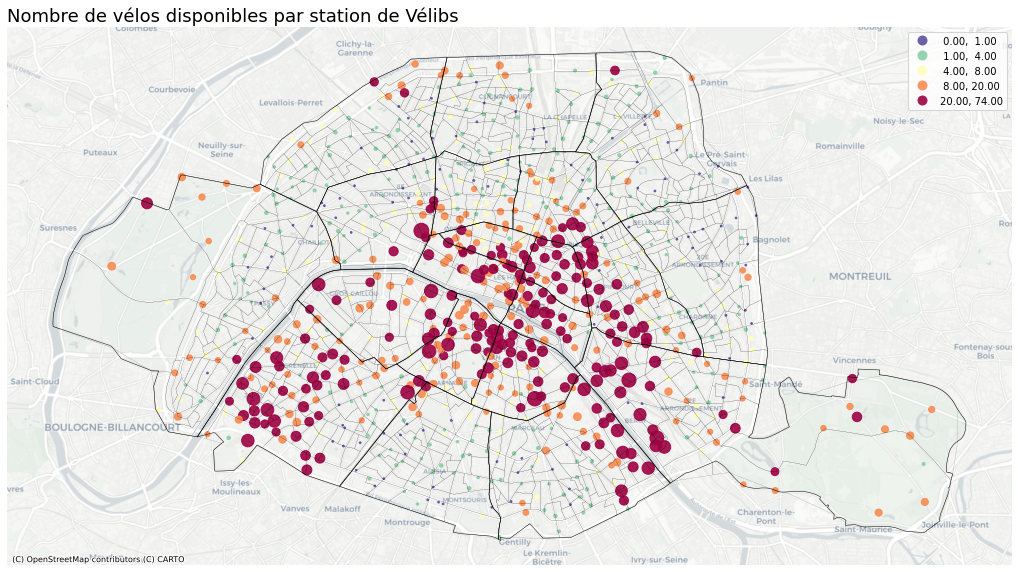

In [ ]:
#Faire une carte avec trois couches

Carte1, ax = plt.pyplot.subplots(figsize=(18,18))
VelibParis.to_crs('EPSG:3857').plot(ax=ax,column="numbikesavailable", markersize=VelibParis['numbikesavailable']*3 ,alpha=0.9, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
Ardt.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.5, color = 'black')
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.pyplot.title('Nombre de vélos disponibles par station de Vélibs', loc='left', fontsize=18)
plt.pyplot.show()

In [ ]:
# Enreigistrer une carte en image

Carte1.savefig("Carte1.png")

## Exercice sur la couche Mobilib'

dataset : https://opendata.paris.fr/explore/dataset/liste-des-stations-de-services-de-vehicules

* Carte des stations avec nb d'emplacements (taille) et opérateur (couleur)
* Graphique du nombre se stations par opérateur 

## Jointure attributaire, calcul d'indicateurs, cartographie thématique

In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O population.csv https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D


--2022-02-25 12:15:54--  https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.206.0.62, 54.205.192.36, 54.173.145.175
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.206.0.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘population.csv’

population.csv          [ <=>                ]   2.70M  --.-KB/s    in 0.1s    

2022-02-25 12:15:59 (21.3 MB/s) - ‘population.csv’ saved [2829414]



In [ ]:
#Importer CSV to dataframe

population = pd.read_csv("population.csv", sep=',')
population.head(3)

OBJECTID    n_sq_ir  c_cainsee  ...           l_epci  shape_Length     shape_Area
0         1  930003891      93048  ...  T8 Est Ensemble   1927.186327  139705.062882
1         2  930003875      93048  ...  T8 Est Ensemble   1597.143066  106750.396820
2         3  930003874      93048  ...  T8 Est Ensemble   2494.946453  209582.967651

[3 rows x 72 columns]

In [ ]:
# Ne garder que les colonne importantes

PopulationOK = population[["c_ir", "l_ir", "nb_pop"]]
PopulationOK.head()

c_ir                       l_ir       nb_pop
0  930480801   Bel Air Grands Pêchers 1  3057.042017
1  930480803   Bel Air Grands Pechers 3  2040.366599
2  930480901  Ramenas Fabien Lagrange 1  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  2538.624479
4  930481002         Branly Boissiere 2  1750.317596

In [ ]:
#Renommer les colonnes

PopulationOK = PopulationOK.rename(columns={'c_ir': 'Code_IRIS', 'l_ir':'Libelle', 'nb_pop': 'Population'})
PopulationOK.head()

Code_IRIS                    Libelle   Population
0  930480801   Bel Air Grands Pêchers 1  3057.042017
1  930480803   Bel Air Grands Pechers 3  2040.366599
2  930480901  Ramenas Fabien Lagrange 1  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  2538.624479
4  930481002         Branly Boissiere 2  1750.317596

In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(PopulationOK, left_on='code_iris', right_on='Code_IRIS')
IRISPARIS.head()

nom_iris  insee_com  ...             Libelle   Population
0      Val de Grace 7      75105  ...      Val-de-Grace 7  2394.194331
1      Gros Caillou 7      75107  ...      Gros Caillou 7  2257.124076
2         Madeleine 3      75108  ...         Madeleine 3  1089.533803
3         Roquette 18      75111  ...         Roquette 18  2197.653733
4  Folie Mericourt 14      75111  ...  Folie Mericourt 14  1706.345042

[5 rows x 11 columns]

In [ ]:
# Reprojeter la couche IRIS pour le calcul de surface

IRIS2154 = IRISPARIS.to_crs(2154)
IRIS2154.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Ajouter une colonne Surface à la couche des IRIS

IRIS2154["surface"] = IRIS2154['geometry'].area/1000000
IRIS2154.head(10) 

nom_iris  insee_com  ...   Population   surface
0      Val de Grace 7      75105  ...  2394.194331  0.122526
1      Gros Caillou 7      75107  ...  2257.124076  0.123771
2         Madeleine 3      75108  ...  1089.533803  0.079612
3         Roquette 18      75111  ...  2197.653733  0.050855
4  Folie Mericourt 14      75111  ...  1706.345042  0.035169
5    Maison Blanche 3      75113  ...  2599.215028  0.058901
6           Tuileries      75101  ...     0.000000  0.247627
7          Vivienne 1      75102  ...  1669.175559  0.123474
8     Saint-Gervais 2      75104  ...  2173.956963  0.078941
9    Champs Elysees 3      75108  ...   536.556750  0.134344

[10 rows x 12 columns]

In [ ]:
#Calculer la densité de population des IRIS

IRIS2154["Densite"] = IRIS2154["Population"] / IRIS2154["surface"]
IRIS2154.head()

nom_iris  insee_com  iris  ...   Population   surface       Densite
0      Val de Grace 7      75105  1907  ...  2394.194331  0.122526  19540.231046
1      Gros Caillou 7      75107  2807  ...  2257.124076  0.123771  18236.237401
2         Madeleine 3      75108  3103  ...  1089.533803  0.079612  13685.554321
3         Roquette 18      75111  4318  ...  2197.653733  0.050855  43214.172803
4  Folie Mericourt 14      75111  4114  ...  1706.345042  0.035169  48518.853703

[5 rows x 13 columns]

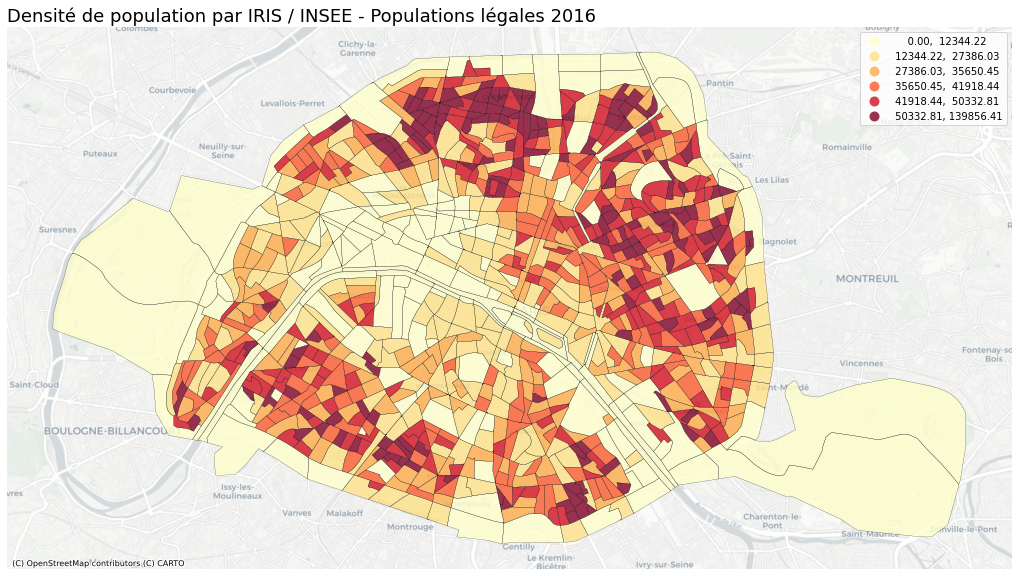

In [ ]:
#Faire une carte des densité de population par IRIS

Carte2, ax = plt.pyplot.subplots(figsize=(18,18))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRIS2154.to_crs('EPSG:3857').plot(ax=ax, k=6, column='Densite', cmap='YlOrRd',scheme='quantiles', alpha= 0.8, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.pyplot.title('Densité de population par IRIS / INSEE - Populations légales 2016', loc='left', fontsize=18)
plt.pyplot.show()

In [ ]:
# Faire une carte interactive avec la biliothèque Folium (https://python-visualization.github.io/folium/)

IRISfolium = pd.DataFrame(IRIS2154)

m = folium.Map(
    width='80%',height='50%',
    location=[48.863170000122665, 2.342566412818605],
    zoom_start=12,
    tiles="cartodbpositron")

map = folium.Choropleth(
    geo_data=IRIS2154,
    data=IRISfolium,
    name="choropleth",
    columns=["iris", "Densite"],
    key_on="feature.properties.iris",
    fill_color="YlOrRd",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="Densité de population (habitants/km2)",
).add_to(m)

folium.GeoJsonTooltip(['nom_iris', 'Population', 'Densite']).add_to(map)



m

TypeError: ignored

AttributeError: ignored

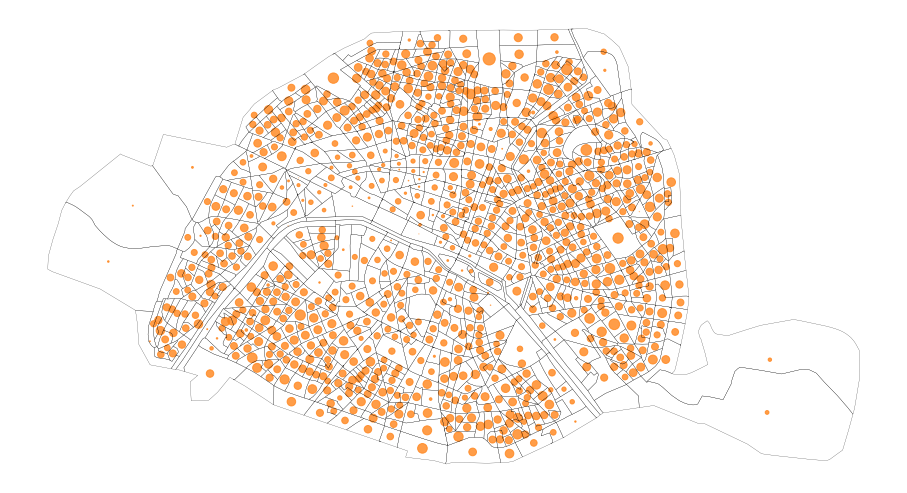

In [ ]:
# Faire une carte des populations par IRIS

IRIScentro = IRIS2154.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte3, ax = plt.pyplot.subplots(figsize=(16,14))
IRISPARIS.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
IRIScentro.plot(ax=ax, color="#FF851B", markersize=IRIScentro['Population']/50, alpha=0.8, categorical=False, legend=True)
ax.axis("off")
plt.pyplottitle('Population par IRIS\nINSEE - population légale 2016', loc='left', fontsize=15)
plt.pyplotshow()

## Dissolve(With Stat)

geometry  ...   Population
nom_com                                                                      ...             
Paris 10e Arrondissement  POLYGON ((2.35411 48.86928, 2.35282 48.86955, ...  ...   168.476846
Paris 11e Arrondissement  POLYGON ((2.37163 48.85278, 2.37059 48.85300, ...  ...  2197.653733
Paris 12e Arrondissement  POLYGON ((2.38978 48.82592, 2.38889 48.82660, ...  ...  2629.000906
Paris 13e Arrondissement  POLYGON ((2.35844 48.81601, 2.35747 48.81599, ...  ...  2599.215028
Paris 14e Arrondissement  POLYGON ((2.31802 48.82144, 2.31673 48.82172, ...  ...  2011.495479

[5 rows x 10 columns]

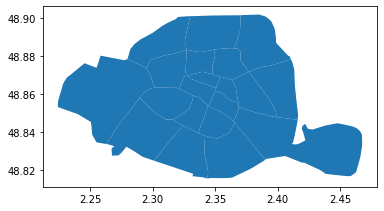

In [ ]:
# Créer une couche des arrondissements

ARDT = IRISPARIS.dissolve(by='nom_com')
ARDT.plot()
ARDT.head()

In [ ]:
# Créer une couche des arrondissements avec une agrégation statistiques (Population)

ARDT = IRIS2154.dissolve(by='insee_com', aggfunc='sum')
ARDT.head()


geometry  ...        Densite
insee_com                                                     ...               
75101      POLYGON ((652081.290 6862048.180, 652038.370 6...  ...  196419.344299
75102      POLYGON ((651674.870 6863044.640, 651580.760 6...  ...  328710.884634
75103      POLYGON ((652508.700 6862567.660, 652413.950 6...  ...  557159.554395
75104      POLYGON ((653050.930 6861120.690, 652966.350 6...  ...  359457.988367
75105      POLYGON ((651897.060 6859945.570, 651801.780 6...  ...  834564.296242

[5 rows x 9 columns]

In [ ]:
A= IRISPARIS["Population"].sum()
B= ARDT["Population"].sum()

print (A,B)

2206488.0 2206488.0



## Exercice avec les données de logement des IRIS

https://opendata.apur.org/datasets/recensement-iris-logement/data


* Produire une carte avec en cercle proportionnels le nombre de logement sociaux 
* Produire une carte avec en aplat de couleur le taux de logement vacant



In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O logement.csv https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D

--2022-02-16 14:06:47--  https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 54.237.73.127, 54.88.180.152, 34.198.192.155
Connecting to opendata.arcgis.com (opendata.arcgis.com)|54.237.73.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘logement.csv’

logement.csv            [ <=>                ]   3.40M  --.-KB/s    in 0.09s   

2022-02-16 14:06:47 (38.7 MB/s) - ‘logement.csv’ saved [3560464]



In [ ]:
#Importer CSV to dataframe

logement = pd.read_csv("logement.csv", sep=',')
logement.head(3)

OBJECTID    n_sq_ir  c_cainsee  ...           l_epci  shape_Length     shape_Area
0         1  930003891      93048  ...  T8 Est Ensemble   1927.186327  139705.062882
1         2  930003875      93048  ...  T8 Est Ensemble   1597.143066  106750.396820
2         3  930003874      93048  ...  T8 Est Ensemble   2494.946453  209582.967651

[3 rows x 87 columns]

In [ ]:
# Ne garder que les colonne importantes

LogementOK = logement[["c_ir", "l_ir", "nb_log", "nb_logvac", "nb_loc_social"]]
LogementOK.head()

c_ir                       l_ir  ...  nb_loc_social   pct_prop
0  930480801   Bel Air Grands Pêchers 1  ...     382.744007  48.581540
1  930480803   Bel Air Grands Pechers 3  ...     548.040149  15.386200
2  930480901  Ramenas Fabien Lagrange 1  ...     135.500873  37.350284
3  930480903  Ramenas Fabien Lagrange 3  ...     349.870857  35.036602
4  930481002         Branly Boissiere 2  ...     139.873760  48.563464

[5 rows x 6 columns]

In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(LogementOK, left_on='code_iris', right_on='c_ir')
IRISPARIS.head(2)

nom_iris  insee_com  iris  ... nb_logvac_y  nb_loc_social_y   pct_prop
0  Val de Grace 7      75105  1907  ...   98.032090        89.589028  38.492934
1  Gros Caillou 7      75107  2807  ...   53.253745         3.273282  41.784307

[2 rows x 23 columns]

In [ ]:
#Calculer le taux de logements vacant

IRISPARIS["txlogvac"] = IRISPARIS["nb_logvac"] / IRISPARIS["nb_log"] *100
IRISPARIS.head()

nom_iris  insee_com  iris  ...   nb_logvac  nb_loc_social   txlogvac
0      Val de Grace 7      75105  1907  ...   98.032090      89.589028   7.395817
1      Gros Caillou 7      75107  2807  ...   53.253745       3.273282   4.129804
2         Madeleine 3      75108  3103  ...   86.884528      42.172518  12.886811
3         Roquette 18      75111  4318  ...  118.252164      10.132180   7.147318
4  Folie Mericourt 14      75111  4114  ...  172.140363       0.000000  13.966787

[5 rows x 17 columns]

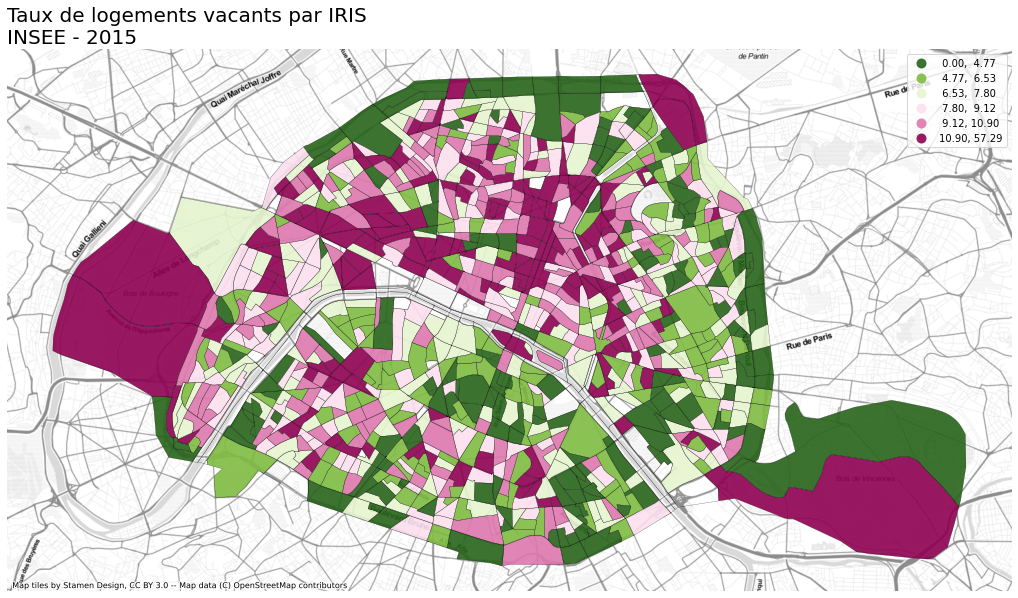

In [ ]:
#Faire une carte du taux de logements vacants par IRIS

Carte4, ax = plt.pyplot.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRISPARIS.to_crs('EPSG:3857').plot(ax=ax, k=6, column='txlogvac', cmap='PiYG_r',scheme='quantiles', alpha=0.9, legend=True)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.axis("off")
plt.pyplot.title('Taux de logements vacants par IRIS\nINSEE - 2015', loc='left', fontsize=20)
plt.pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


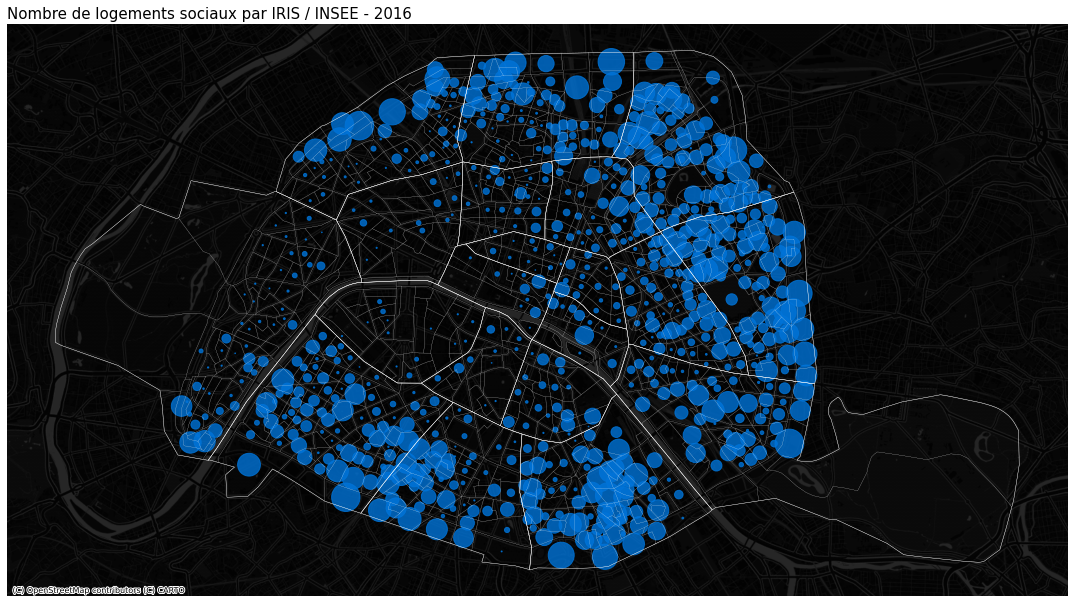

In [ ]:
# Faire une carte du nombre de logements sociaux par IRIS

IRIScentro = IRISPARIS.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte5, ax = plt.pyplot.subplots(figsize=(19,19))
ARDT.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.4, color = 'white')
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'white')
IRIScentro.to_crs('EPSG:3857').plot(ax=ax, color="#0074D9", markersize=IRIScentro['nb_loc_social']/2, alpha=0.8, categorical=False, legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)
ax.axis("off")
plt.pyplot.title('Nombre de logements sociaux par IRIS / INSEE - 2016', loc='left', fontsize=15)
plt.pyplot.show()

## Faire la carte du tx de locataire par IRIS

pct_prop = pourcentage de propriétaire
